# DeepLearning Project
# Name-Anand kumar
## Course - Deep Leaning and Reinforcement Learning

# Main Objective:

1.   Use of CNN to classify grapevine leaves
2.   Use of Variational Autoencoder for generating synthetic image dataset



# Dataset Used - Grapevine Leaves Image Dataset

Pistachio is a shelled fruit from the anacardiaceae family. The homeland of pistachio is the Middle East. The Kirmizi pistachios and Siirt pistachios are the major types grown and exported in Turkey. Since the prices, tastes, and nutritional values of these types differs, the type of pistachio becomes important when it comes to trade. This study aims to identify these two types of pistachios, which are frequently grown in Turkey, by classifying them via convolutional neural networks. Within the scope of the study, images of Kirmizi and Siirt pistachio types were obtained through the computer vision system. The pre-trained dataset includes a total of 2148 images, 1232 of Kirmizi type and 916 of Siirt type. Three different convolutional neural network models were used to classify these images. Models were trained by using the transfer learning method, with AlexNet and the pre-trained models VGG16 and VGG19. The dataset is divided as 80% training and 20% test. As a result of the performed classifications, the success rates obtained from the AlexNet, VGG16, and VGG19 models are 94.42%, 98.84%, and 98.14%, respectively. Models’ performances were evaluated through sensitivity, specificity, precision, and F-1 score metrics. In addition, ROC curves and AUC values were used in the performance evaluation. The highest classification success was achieved with the VGG16 model. The obtained results reveal that these methods can be used successfully in the determination of pistachio types.



1.   Classification of five classes of grapevine leaves by CNN Model
2.   Use of Variational AutoEncoder to generate synthetic  Images




Dataset:


1.   Contains 2248 images
2.   belonging to 2 categories
<br>
Classes are ---

1.   Kirmizi_Pistachio =  0,
2.   Siirt_Pistachio =  1,





In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, Conv2DTranspose, Flatten, RandomRotation, Dropout, Input

from keras.metrics import Accuracy
from keras.models import Model, Sequential


In [103]:
!curl  https://www.muratkoklu.com/datasets/Pistachio_Image_Dataset.zip -o file.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26.5M  100 26.5M    0     0  7226k      0  0:00:03  0:00:03 --:--:-- 7226k


In [ ]:
!unzip file.zip

In [105]:
!ls

file.zip			Pistachio_Image_Dataset  sample_data
Grapevine_Leaves_Image_Dataset	Pumpkin_Seeds_Dataset


(600, 600, 3)


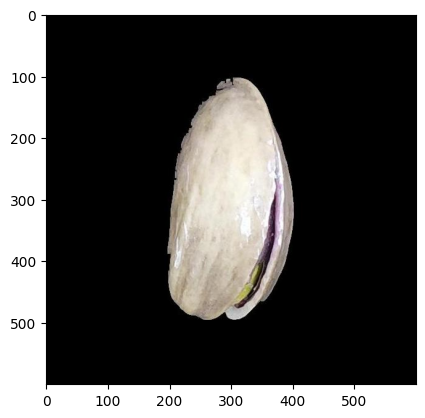

In [116]:
from PIL import Image
i = Image.open('Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 82.jpg')
plt.imshow(i)
print(np.array(i).shape)

# DATA ENGINEERING
</UL > KERAS IMAGE DATA GENERATOR IS USED TO MAKE THE DATASET</UL>
<UL>IMAGES ARE SCALED BETWEEN 0 AND 1 </UL>
<UL>IMAGES ARE RESHAPE FROM (600,600,3) TO (256,256,1) TO TRAIN THE MODEL FASTER</UL>
<UL>IMAGES ARE CONVERTED FROM RGB TO GRAYSCALE FOR REDUCING THE COMPUTATIONAL COST </UL>
<UL>IMAGES ARE SPLIT IN TRAINING SET 80% AND VALIDATION SET 20% </UL>

In [117]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)
img_size = (256,256)
batch_size = 32

train_generator = datagen.flow_from_directory(
    'Pistachio_Image_Dataset/Pistachio_Image_Dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    color_mode='grayscale'
)

validation_generator = datagen.flow_from_directory(
    'Pistachio_Image_Dataset/Pistachio_Image_Dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    color_mode='grayscale'
)

Found 1719 images belonging to 2 classes.
Found 429 images belonging to 2 classes.


In [149]:
path = 'Pistachio_Image_Dataset/Pistachio_Image_Dataset'
image_batch, label_batch = next(iter(train_generator))

In [118]:
REVERSE_LOOKUP = {j:i for i,j in train_generator.class_indices.items()}

In [132]:
REVERSE_LOOKUP

{0: 'Kirmizi_Pistachio', 1: 'Siirt_Pistachio'}

In [127]:
def plot_images(datagen):
    images, labels = next(datagen)
    fig = plt.figure(figsize=(28, 28))
    for i in range(5):
        ax = fig.add_subplot(1,5, i+1)
        ax.axis('off')
        print(images[i].shape)
        plt.title(REVERSE_LOOKUP[np.argmax(labels[i])])
        ax.imshow(images[i])

    plt.show()

(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)


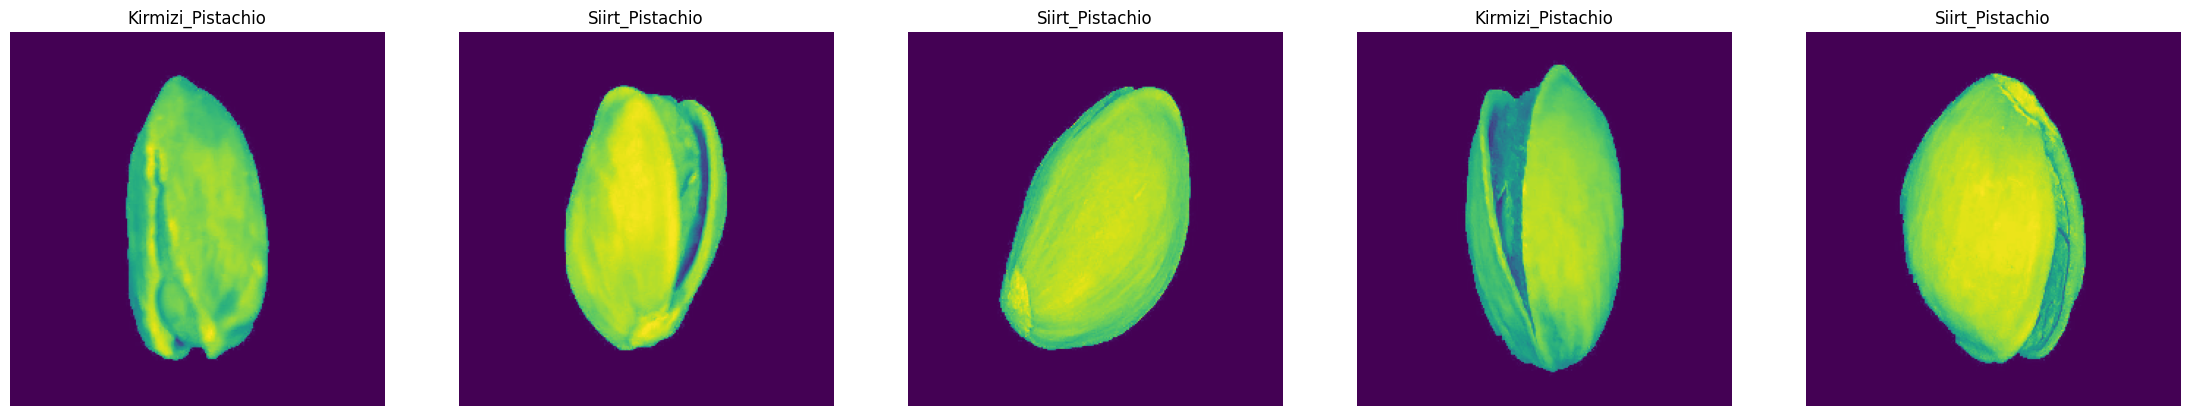

In [128]:
plot_images(train_generator)

# MODEL TRAINED
### LAYERS USED ARE - CONV2D, AVERAGEPOOLING2D , BATCHNORMALIZATION, FLATTEN
#### MODEL LAYOUT:
CONV2D --> AVERAGEPOOLING2D --> BATCHNORMALIZATION --> CONV2D --> AVERAGEPOOLING2D --> BATCHNORMALIZATION --> FLATTEN --> DENSE --> BATCHNORMALIZATION --> DENSE --> BATCHNORMALIZATION --> DENSE 
<BR><BR>
(5,5) KERNEL SIZE IS USED IN CONV2D AND AVERAGEPOOLING2D <BR> <BR>
ACTIVATION USED IS RELU IS INTERMEDIATE LAYERS AND SOFTMAX ON OUTPUT LAYER <BR> <BR>
LOSS FUNCTION USED IS CATEGORICAL CROSS ENTROPY <BR> <BR>
OPTIMIZER USED IS ADAM <BR> <BR>
REACHED ACCURACY OF 88.6% ON VALIDATION AND 93.4% TRAIN SET IN 15 EPOCHS


In [129]:
from keras.layers import AveragePooling2D, BatchNormalization

model = Sequential()

# Block 1
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', input_shape=(256, 256, 1)))
model.add(AveragePooling2D(pool_size=(5,5)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same'))
model.add(AveragePooling2D(pool_size=(5,5)))
model.add(BatchNormalization())

model.add(Flatten())


#Block 5
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())


model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [130]:
from keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [133]:
model.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9335 - loss: 0.1848

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 186ms/step - accuracy: 0.9333 - loss: 0.1851 - val_accuracy: 0.8275 - val_loss: 0.4550
Epoch 2/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.9195 - loss: 0.2100 - val_accuracy: 0.7459 - val_loss: 0.9682
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.9116 - loss: 0.2043 - val_accuracy: 0.5734 - val_loss: 28.7502
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.9175 - loss: 0.2218 - val_accuracy: 0.7366 - val_loss: 0.9521
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.8907 - loss: 0.2581 - val_accuracy: 0.8741 - val_loss: 0.3585
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9261 - loss: 0.1859 - val_accuracy: 0.7506 - val_loss: 0.6940
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.9206 - loss: 0.1882 - val_accuracy: 0.7716 - val_loss: 0.5861
Epoch 8/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9360 - loss: 0.1671 - val_accuracy: 0.8322 - val_los

## FURTHER IMPROVEMENT
### MORE LAYERS CAN IMPROVE THE ACCURACY AND WE CAN INCOMPORATE DATA AUGMENTATION LIKE RANDOM CROP , RANDOMFLIP , RANDOMZOOM, RANDOMROTATION TO ACHIEVE BETTER ACCURACY AND AVOID OVERFITTING

In [134]:
def testing(train):
    img, label = next(train)
    pred = model.predict(img)
    fig = plt.figure(figsize=(28,28))
    for i in range(10):
        ax = fig.add_subplot(1, 10, i+1)
        ax.imshow(img[i])
        plt.title(REVERSE_LOOKUP[np.argmax(pred[i])])
        print(pred[i])
        plt.annotate(REVERSE_LOOKUP[np.argmax(label[i])], xy=(0,0), xytext=(5,5))
        ax.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
[0.99743605 0.00256389]
[0.8266258  0.17337416]
[0.01446284 0.9855371 ]
[0.25191692 0.7480831 ]
[0.9691049  0.03089514]
[0.9918588  0.00814123]
[0.987604   0.01239591]
[0.4233709  0.57662904]
[0.95772684 0.04227316]
[9.9940705e-01 5.9295748e-04]


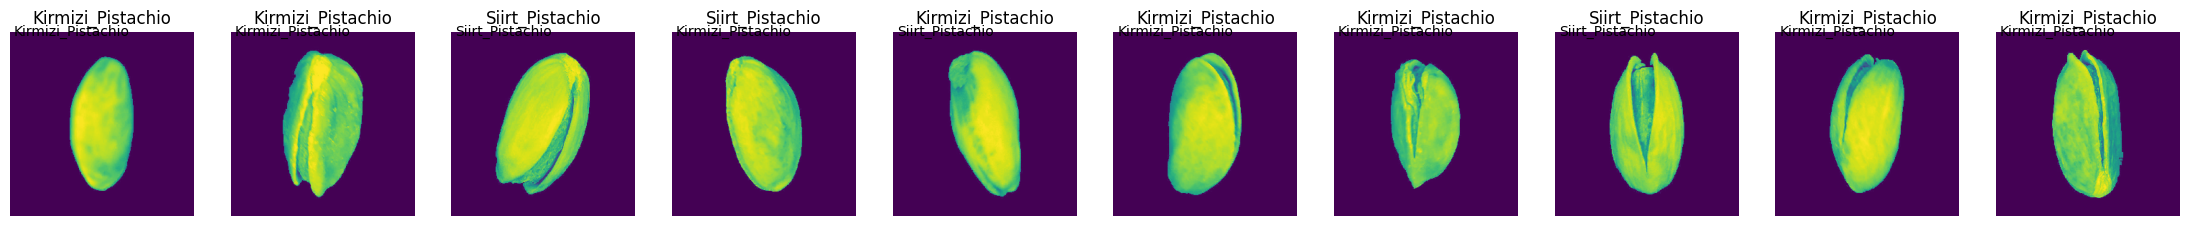

In [135]:
testing(train_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[0.00592174 0.9940782 ]
[0.15623409 0.8437659 ]
[0.7904934  0.20950657]
[0.01745241 0.9825476 ]
[9.9999976e-01 2.5469595e-07]
[0.00753659 0.99246335]
[9.999404e-01 5.960925e-05]
[0.02390796 0.97609204]
[0.04975304 0.95024693]
[0.9974437  0.00255638]


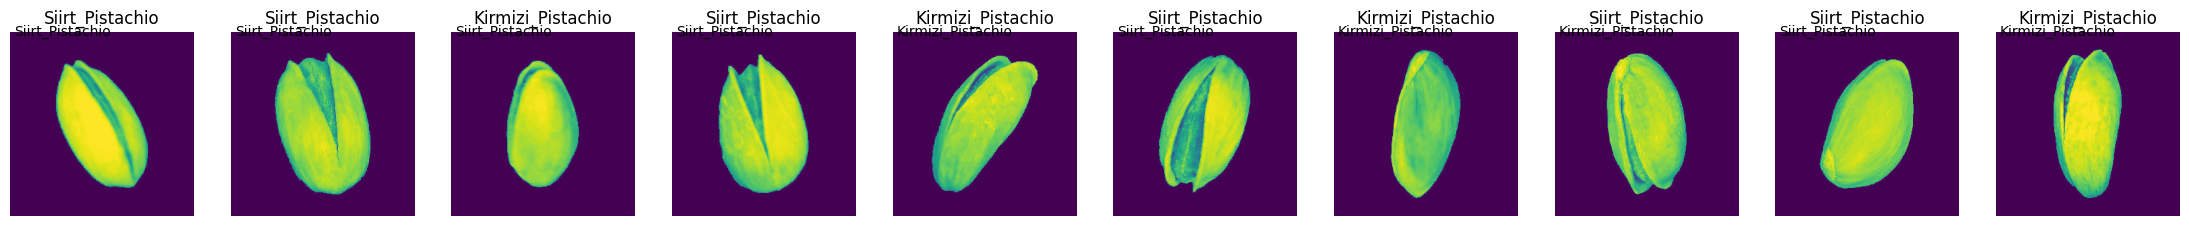

In [136]:
testing(validation_generator)

# PART 2: VARIATIONAL AUTOENCODER
<BR> <BR>

## DATASET USED - SAME AS PART 1
## MODEL USED: (ENCODER AND DECODER MODEL) VARIATIONAL AUTOENCODER DECOMPOSE THE DATA TO DISTRIBUTION THROUGH ENCODER AND DECODER TRY TO RECREATE INPUT 
### LAYERS USED: CONV2D, DENSE, FLATTEN, CONV2DTRANSPOSE, DROPOUT, RESHAPE

<BR><BR>

### LOSS FUNCTION IS CUSTOM CREATED AS KL_LOSS AND RECREATION LOSS 
### OUTPUT OF ENCODER  z = z_mean + exp(0.5 * z_log_var) * epsilon

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_46      │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 256, 256,  │        320 │ input_layer_46[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 256, 256,  │     18,496 │ conv2d_60[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_30          │ (None, 4194304)   │          0 │ conv2d_61[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_82 (Dense)    │ (None, 16)        │ 67,108,880 │ flatten_30[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 16)        │          0 │ dense_82[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │         34 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │         34 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_12         │ (None, 2)         │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 67,127,764 (256.07 MB)

 Trainable params: 67,127,764 (256.07 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_47 (InputLayer)     │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 262144)         │       786,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_16 (Reshape)            │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_44             │ (None, 128, 128, 64)   │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_45             │ (None, 256, 256, 32)   │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_46             │ (None, 256, 256, 1)    │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 842,113 (3.21 MB)

 Trainable params: 842,113 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

Starting training...
Epoch 1/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - kl_loss: 0.0011 - loss: 45437.7734 - reconstruction_loss: 45437.7734
Epoch 2/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - kl_loss: 3687.8333 - loss: 49157.3438 - reconstruction_loss: 45469.5117
Epoch 3/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - kl_loss: 129.1369 - loss: 45402.8867 - reconstruction_loss: 45273.7500
Epoch 4/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - kl_loss: 295.8069 - loss: 45428.6289 - reconstruction_loss: 45132.8203
Epoch 5/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - kl_loss: 258.4108 - loss: 45226.6133 - reconstruction_loss: 44968.2031
Epoch 6/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - kl_loss: 193.8894 - loss: 44965.1172 - reconstruction_loss: 44771.2266
Epoch 7/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - kl_loss: 143.1664 - loss: 44662.0938 - reconstruction_loss: 44518.9258
Epoch 8/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - kl_loss: 123.6908 - loss: 44267.0742 - reconstruction_loss: 

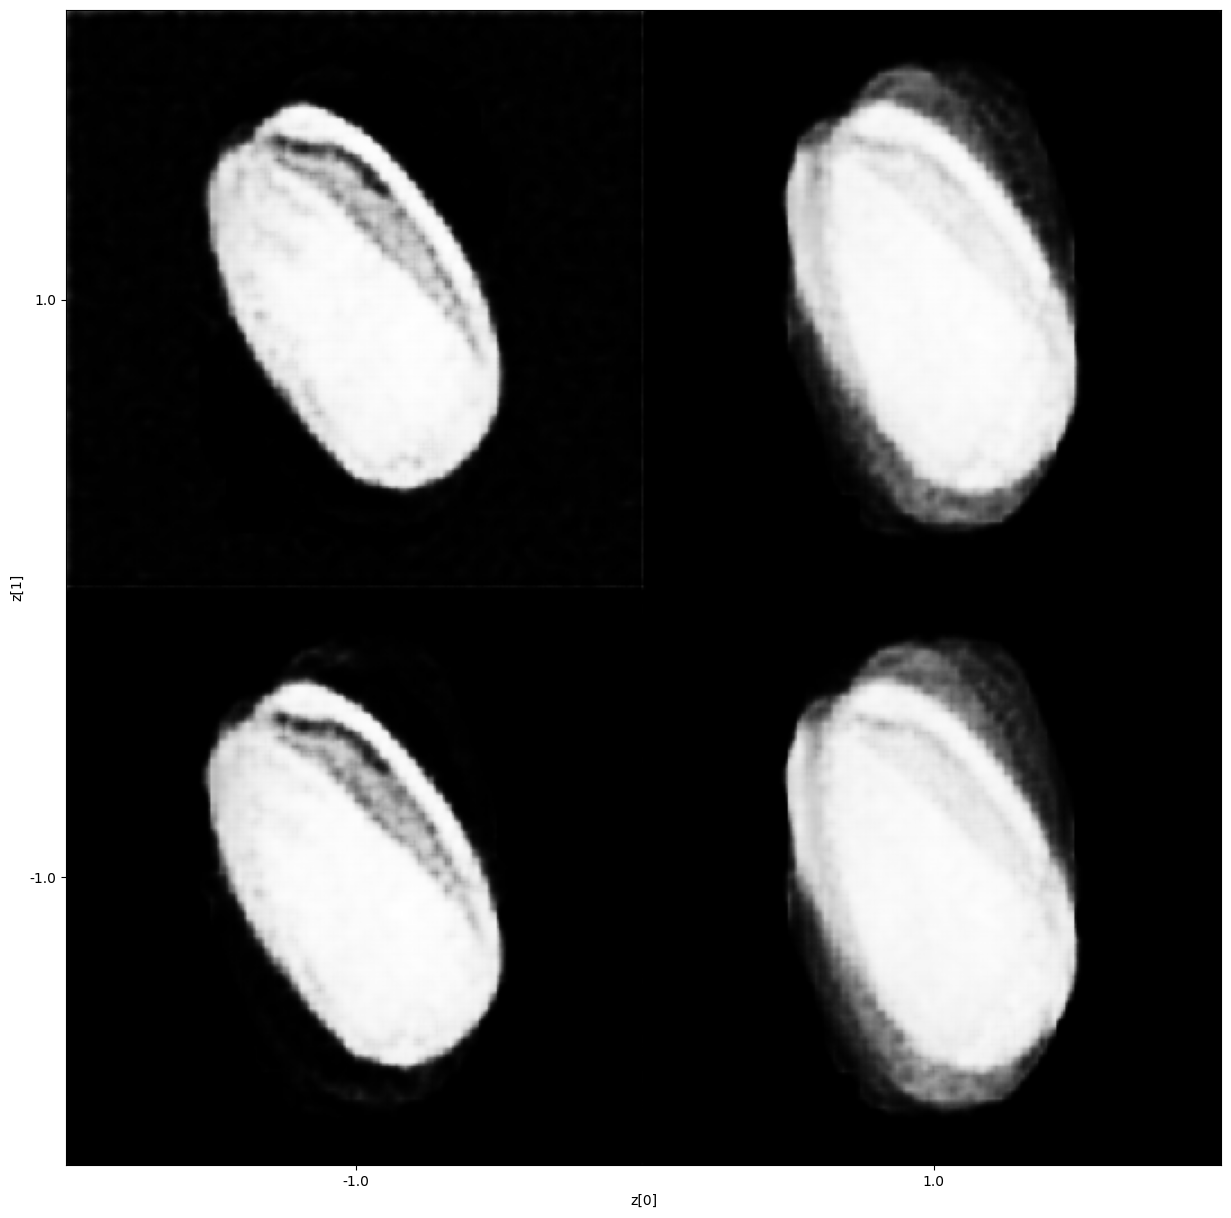

In [158]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt

# ==========================================
# 1. The Sampling Layer (Reparameterization)
# ==========================================
class Sampling(layers.Layer):
    """
    Uses (z_mean, z_log_var) to sample z, the vector encoding a digit.
    z = z_mean + exp(0.5 * z_log_var) * epsilon
    """
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]

        # Epsilon is random noise from a standard normal distribution
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))

        # The reparameterization trick
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# ==========================================
# 2. Define the Encoder
# ==========================================
latent_dim = 2  # 2D latent space allows us to visualize the manifold later

encoder_inputs = keras.Input(shape=(256, 256, 1))

# Convolutional downsampling
x = layers.Conv2D(32, 3, activation="relu", strides=1, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=1, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dropout(0.4)(x)

# Output two separate vectors: Mean and Log Variance
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

# Sample the latent vector z
z = Sampling()([z_mean, z_log_var])

encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

# ==========================================
# 3. Define the Decoder
# ==========================================
latent_inputs = keras.Input(shape=(latent_dim,))

# Upsampling back to image dimensions
x = layers.Dense(64* 64 * 64, activation="relu")(latent_inputs)
x = layers.Dropout(0.4)(x)
x = layers.Reshape((64, 64, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)

# Sigmoid activation because MNIST pixels are normalized to [0, 1]
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

# ==========================================
# 4. The VAE Model (Custom Train Step)
# ==========================================
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            # 1. Reconstruction Loss (Binary Crossentropy)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )

            # 2. KL Divergence Loss
            # D_KL = -0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))

            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

# ==========================================
# 5. Train on MNIST
# ==========================================
# (x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalize and reshape
# mnist_digits = np.concatenate([x_train, x_test], axis=0)
# mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

print("Starting training...")
vae.fit(image_batch, epochs=400, batch_size=128)

# ==========================================
# 6. Visualize the Latent Space
# ==========================================
def plot_latent_space(vae, n=2, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 256
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))

    # Linearly spaced coordinates on the unit square were transformed
    # through the inverse CDF (ppf) of the Gaussian
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample, verbose=0)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()

print("Plotting latent space...")
plot_latent_space(vae)

## FINAL INSIGHTS THE MODEL SUCCESSFUL IN RECONSTRUCTING THE PISTACHIO IMAGE WITH GOOD ACCURACY
<BR> <BR>

## IMPROVEMENTS CAN BE DONE 
### DATA AUGMENTATION LIKE RANDOM FLIP, RANDOM ROTATION, RANDOM CROP CAN IMPROVE THE ACCURACY AND AVOID OVERFITTING
### IT CAN BE TRAINED ON 500 TO 700 EPOCHS FOR BETTER IMAGE GENERATION
<BR> <BR>
<BR>

## SCOPE IN MARKET
### VAN CAN BE USED TO GENERATE SYNTHETIC IMAGE DATA WHICH CAN IMPROVE THE LOW DATA PROBLEM 
### IT CAN UPSCALE THE IMAGE IT CAN BE DEPLOYED IN AI THAT CAN UPSCALE THE IMAGE FROM LOW RESOLUTION TO HIGH RESOLUTION
### IT CAN BE USED TO RESTORE DAMAGED IMAGES AND RECREATE THE DAMAGE AREA 
### IT CAN BE DEPLOYED AS WATERMARK REMOVE AND CAN REMOVE THE WATERMARK ON PHOTOS
<BR> <BR>

## FLAWS 
<ul> MODEL LIKE VAN SMOOTH OUT IMAGES MEANS THE IMAGE IS NOT AS SHARP AS ORIGINAL </ul>
<ul>MODEL ONLY GENERATE IMAGES ON WHICH IT IS TRAINED </ul>
<ul>MODEL CAN SUFFER FROM OVERFITTING BUT NOT AS MUCH AS AUTOENCODER</ul>
<ul>IT REQUIRE HUGE COMPUTATIONAL POWER TO TRAIN THIS MODEL </ul>
